In [1]:

import pandas as pd
import numpy as np
 
# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

 
############################################
# Getting Stock data using nsepy library
from nsepy import get_history
from datetime import datetime
 
startDate=datetime(2019, 1,1)
endDate=datetime(2020, 10, 5)
 
# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.head()

(436, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


<AxesSubplot:xlabel='TradeDate'>

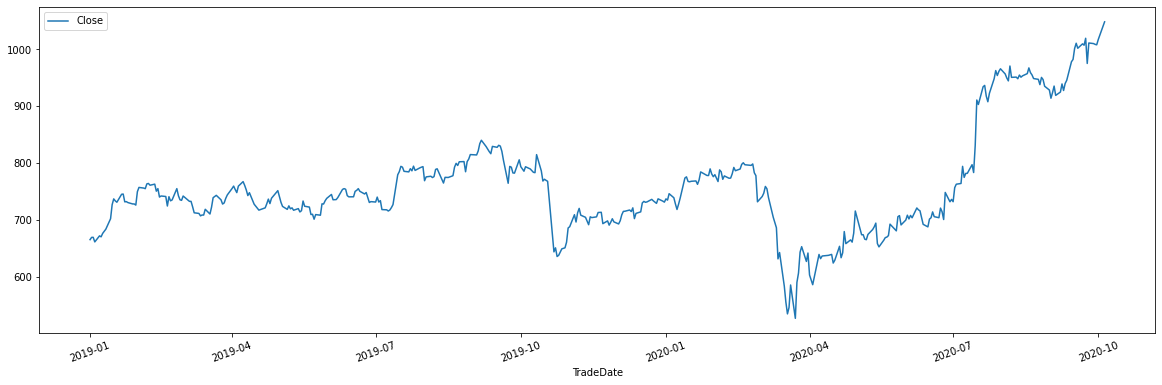

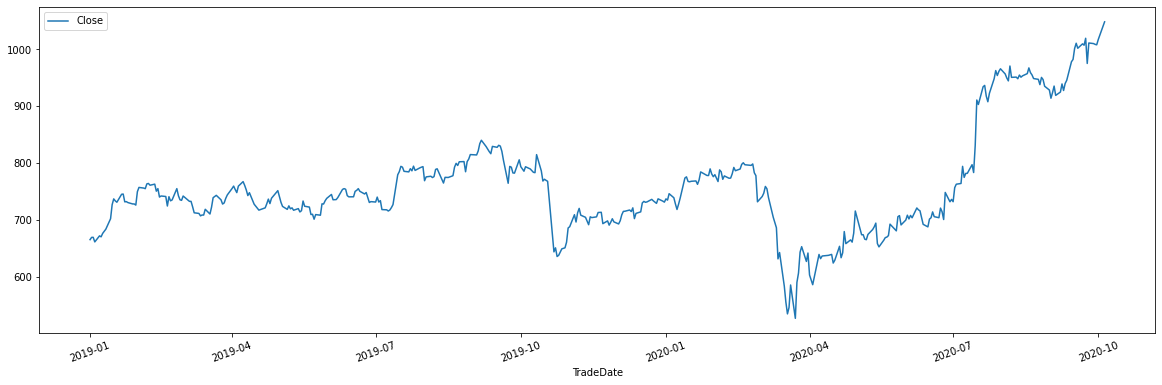

In [2]:

# Creating a column as date
StockData['TradeDate']=StockData.index

# Plotting the stock prices

StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

# Creating a column as date
StockData['TradeDate']=StockData.index
 
# Plotting the stock prices

StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [3]:

# Extracting the closing prices of each day
FullData=StockData[['Close']].values
print(FullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

print('### After Normalization ###')
X[0:5]




[[665.05]
 [669.05]
 [669.15]
 [661.05]
 [671.7 ]]
### After Normalization ###


array([[0.26539014],
       [0.27304931],
       [0.27324079],
       [0.25773097],
       [0.2781235 ]])

In [4]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(426, 10, 1)

#### Output Data shape ####
(426, 1)


In [5]:

# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

############################################

# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)

18
# Choosing the number of testing data records
TestingRecords=5
 
# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]
 
############################################
 
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(421, 10, 1)
(421, 1)

#### Testing Data shape ####
(5, 10, 1)
(5, 1)

#### Training Data shape ####
(421, 10, 1)
(421, 1)

#### Testing Data shape ####
(5, 10, 1)
(5, 1)


In [6]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.26539014]
 [0.27304931]
 [0.27324079]
 [0.25773097]
 [0.2781235 ]
 [0.2749641 ]
 [0.28654859]
 [0.29344184]
 [0.30071805]
 [0.33595022]] -- [0.38324557]
[[0.27304931]
 [0.27324079]
 [0.25773097]
 [0.2781235 ]
 [0.2749641 ]
 [0.28654859]
 [0.29344184]
 [0.30071805]
 [0.33595022]
 [0.38324557]] -- [0.40277645]


In [7]:

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1
Number of TimeSteps: 10
Number of Features: 1


In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
85/85 [==============================] - 13s 20ms/step - loss: 0.0687
Epoch 2/100
85/85 [==============================] - 2s 19ms/step - loss: 0.0060
Epoch 3/100
85/85 [==============================] - 2s 20ms/step - loss: 0.0056
Epoch 4/100
85/85 [==============================] - 1s 17ms/step - loss: 0.0053
Epoch 5/100
85/85 [==============================] - 2s 19ms/step - loss: 0.0053
Epoch 6/100
85/85 [==============================] - 1s 17ms/step - loss: 0.0050
Epoch 7/100
85/85 [==============================] - 1s 18ms/step - loss: 0.0051
Epoch 8/100
85/85 [==============================] - 2s 18ms/step - loss: 0.0051
Epoch 9/100
85/85 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 10/100
85/85 [==============================] - 2s 18ms/step - loss: 0.0049
Epoch 11/100
85/85 [==============================] - 1s 17ms/step - loss: 0.0049
Epoch 12/100
85/85 [==============================] - 2s 18ms/step - loss: 0.0046
Epoch 13/100
85/85 [====

1/1 [==============================] - 0s 462ms/step
Accuracy: 98.64574308263239


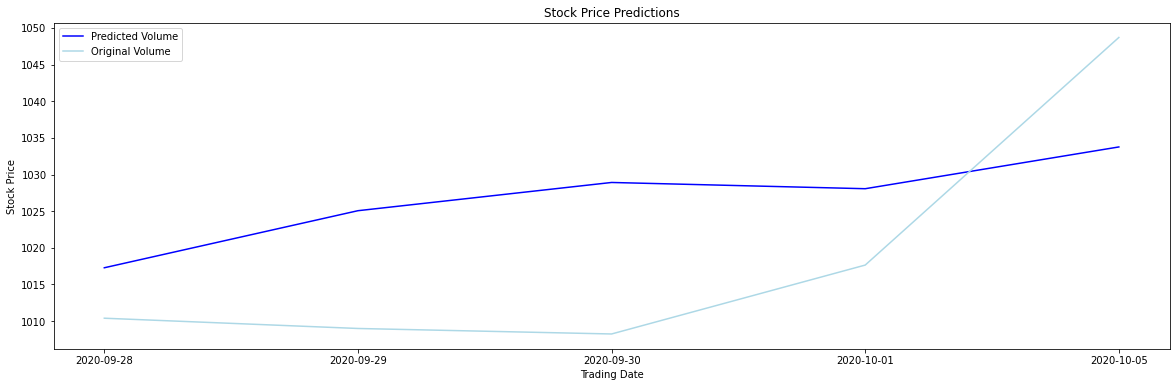

In [9]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

1/1 [==============================] - 0s 24ms/step


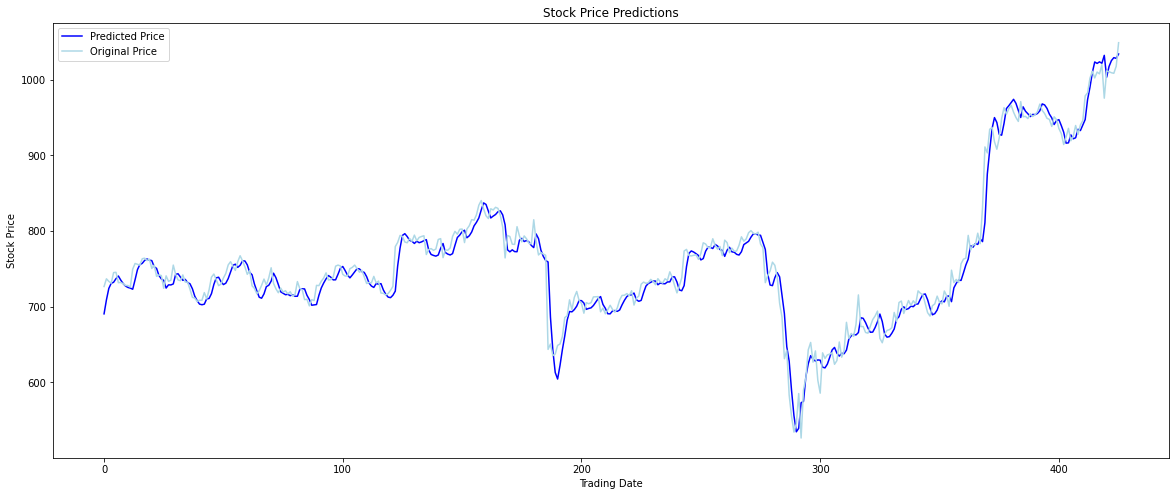

NameError: name 'data_set' is not defined

In [10]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

print(data_set)

In [ ]:

# Last 10 days prices
Last10Days=np.array([1002.15, 1009.9, 1007.5, 1019.75, 975.4,
            1011.45, 1010.4, 1009,1008.25, 1017.65])

# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

# Last 10 days prices
Last10Days=np.array([1002.15, 1009.9, 1007.5, 1019.75, 975.4,
            1011.45, 1010.4, 1009,1008.25, 1017.65])
 
# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)
 
#############################
 
# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 25ms/step


array([[1033.4203]], dtype=float32)